In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

sales    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales.describe(percentiles=[0.03, 0.25, 0.5, 0.75, 0.97])

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
3%,0.000000e+00,4.000000e+00,1.307000e+03,7.900000e+01,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
97%,3.200000e+01,5.800000e+01,2.144000e+04,3.190000e+03,3.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


# Aggregate daily data into monthly data

In [4]:
month_sales = sales.pivot_table(
    index=['shop_id','item_id'],
    values=['item_cnt_day'],
    columns=['date_block_num'],
    aggfunc='sum').reset_index()
cols = [x[0] if x[1] == "" else f"item_cnt_month_{x[1]}" for x in month_sales.columns]
month_sales.columns = cols
month_sales

,shop_id,item_id,item_cnt_month_0,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_4,item_cnt_month_5,item_cnt_month_6,item_cnt_month_7,...,item_cnt_month_24,item_cnt_month_25,item_cnt_month_26,item_cnt_month_27,item_cnt_month_28,item_cnt_month_29,item_cnt_month_30,item_cnt_month_31,item_cnt_month_32,item_cnt_month_33
0,0,30,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,31,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,32,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,33,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,35,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424120,59,22155,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424121,59,22162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,4.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
424122,59,22164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN


In [5]:
month_sales.describe(percentiles=[0.03, 0.97])

,shop_id,item_id,item_cnt_month_0,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_4,item_cnt_month_5,item_cnt_month_6,item_cnt_month_7,...,item_cnt_month_24,item_cnt_month_25,item_cnt_month_26,item_cnt_month_27,item_cnt_month_28,item_cnt_month_29,item_cnt_month_30,item_cnt_month_31,item_cnt_month_32,item_cnt_month_33
count,424124.000000,424124.000000,63224.000000,59935.000000,63977.000000,54638.000000,53296.000000,56196.000000,58035.000000,58022.000000,...,46775.000000,41390.000000,40464.000000,32875.000000,32220.000000,31909.000000,33527.000000,33486.000000,29678.000000,31531.000000
mean,31.431223,11458.020213,2.079574,2.137149,2.299920,1.961821,2.007092,2.231137,2.015439,2.159371,...,2.372443,2.034259,2.026839,2.367361,2.243793,2.009276,1.884660,1.973332,2.454444,2.253528
std,16.962064,6133.332458,3.413133,3.765188,4.839675,3.317368,5.351987,8.878677,7.158472,7.622852,...,11.107013,4.493564,4.430710,12.655934,10.078632,5.886742,5.310389,5.361010,18.446954,14.533295
min,0.000000,0.000000,-13.000000,-4.000000,-2.000000,-2.000000,-1.000000,-1.000000,-2.000000,-2.000000,...,-2.000000,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000
3%,3.000000,1290.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,30.000000,11614.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
97%,58.000000,21586.000000,8.000000,9.000000,10.000000,7.000000,7.000000,8.000000,7.000000,8.000000,...,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,7.000000,8.000000,8.000000
max,59.000000,22169.000000,169.000000,130.000000,259.000000,175.000000,504.000000,766.000000,799.000000,820.000000,...,1127.000000,300.000000,291.000000,1242.000000,742.000000,444.000000,482.000000,436.000000,1644.000000,2253.000000


# EDA

Text(0, 0.5, 'total item counts')

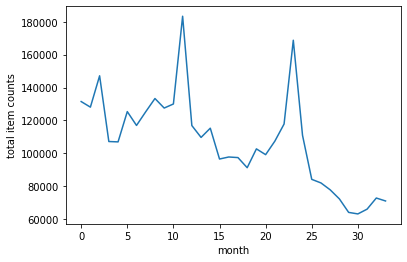

In [6]:
month_stats = sales.groupby("date_block_num").agg({"item_cnt_day":"sum", "item_price":"mean"})
fig = month_stats["item_cnt_day"].plot.line()
fig.set_xlabel("month")
fig.set_ylabel("total item counts")

> Down trend and seasonal pattern with period of one year are observed from monthly sales data. We can decompose the data into three components.

Figure(432x288)


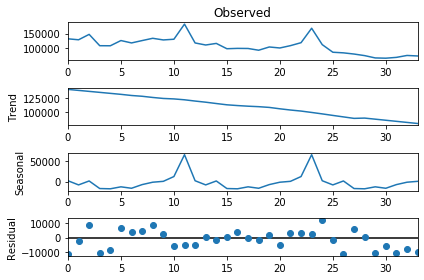

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(month_stats["item_cnt_day"].values, 
                            model="additive", 
                            period=12,
                            extrapolate_trend=12)
print(result.plot())

# Data Processing and Feature Extraction
## Outliers: 
> Clip item_cnt_month values into [0, 20]

In [8]:
def clip_values(x, min_val=0, max_val=20): return max(min(x, max_val), min_val)

item_cnt_cols = ["item_cnt_month_%s"%i for i in range(34)]
month_sales[item_cnt_cols] = month_sales[item_cnt_cols].applymap(clip_values)
month_sales

,shop_id,item_id,item_cnt_month_0,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_4,item_cnt_month_5,item_cnt_month_6,item_cnt_month_7,...,item_cnt_month_24,item_cnt_month_25,item_cnt_month_26,item_cnt_month_27,item_cnt_month_28,item_cnt_month_29,item_cnt_month_30,item_cnt_month_31,item_cnt_month_32,item_cnt_month_33
0,0,30,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,31,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,32,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,33,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,35,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424120,59,22155,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424121,59,22162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,4.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
424122,59,22164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN


# Missing values

In [9]:
missing_values = month_sales[item_cnt_cols].isnull().sum().sum()
total_values = len(month_sales) * len(item_cnt_cols)
print(f"Number of missing values: {missing_values}")
print(f"Number of total values: {total_values}")
print(f"Pecentage of missing values: {missing_values/total_values*100}%")

Number of missing values: 12811092
Number of total values: 14420216
Pecentage of missing values: 88.84119350223325%


In [10]:
month_sales[item_cnt_cols].isnull().sum(axis=1).describe(percentiles=[0.1, 0.9])

count    424124.000000
mean         30.206006
std           4.152940
min           0.000000
10%          25.000000
50%          32.000000
90%          33.000000
max          33.000000
dtype: float64

> month_sales is a sparse data and almost 90% of elements are missing. Non-negtive matrix factorization is used to fill NA values

## Split train and validation for Non-negative matrix factorization

In [11]:
np.random.seed(19)
train_mask = np.random.rand(*month_sales[item_cnt_cols].shape) < 0.8
valid_mask = ~train_mask
na_mask = month_sales[item_cnt_cols].isnull().values
train_data = month_sales[item_cnt_cols].fillna(0).values
train_data[valid_mask] = 0
valid_data = month_sales[item_cnt_cols].values[valid_mask & ~na_mask]

In [12]:
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error


train_errors = []
valid_errors = []
n_components_list = [n for n in range(20, 50, 10)]
n_components_list = [2, 4, 6, 8, 10, 12]
for n_compoents in n_components_list:
    model = NMF(n_components=n_compoents, init='random', random_state=23)
    W = model.fit_transform(train_data)
    H = model.components_
    WH = W.dot(H)
    train_error = np.sqrt(mean_squared_error(train_data[train_mask & ~na_mask], WH[train_mask & ~na_mask]))
    valid_error = np.sqrt(mean_squared_error(valid_data, WH[valid_mask & ~na_mask]))
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    print("N components: %s, train error: %s, valid error: %s"%(n_compoents, train_error, valid_error))

N components: 2, train error: 2.3860249859118263, valid error: 2.5911525021340394
N components: 4, train error: 2.102700597598647, valid error: 2.488095989929718
N components: 6, train error: 1.9414304187605846, valid error: 2.498105231371291
N components: 8, train error: 1.761638022346015, valid error: 2.487618664740588
N components: 10, train error: 1.6419701016049006, valid error: 2.5486897038901533
N components: 12, train error: 1.5334483075359415, valid error: 2.6154787377392816


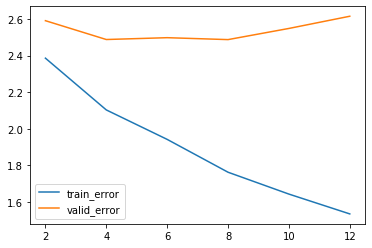

In [13]:
errors = pd.DataFrame({"train_error": train_errors, "valid_error":valid_errors}, index= n_components_list)
errors.plot.line()

> The best n_components is probably to be 4

## Retain with all data

In [14]:
model = NMF(n_components=4, init='random', random_state=23)
W = model.fit_transform(month_sales[item_cnt_cols].fillna(0).values)
H = model.components_
WH = W.dot(H)

## Fill NA's of month_sales

In [15]:
filled_sales = pd.DataFrame(WH, columns=item_cnt_cols, index=month_sales.index)
month_sales[item_cnt_cols] = (1-na_mask) * month_sales[item_cnt_cols].fillna(0) + na_mask * filled_sales
month_sales

,shop_id,item_id,item_cnt_month_0,item_cnt_month_1,item_cnt_month_2,item_cnt_month_3,item_cnt_month_4,item_cnt_month_5,item_cnt_month_6,item_cnt_month_7,...,item_cnt_month_24,item_cnt_month_25,item_cnt_month_26,item_cnt_month_27,item_cnt_month_28,item_cnt_month_29,item_cnt_month_30,item_cnt_month_31,item_cnt_month_32,item_cnt_month_33
0,0,30,2.824538,20.000000,3.672525,2.684518,2.444396,2.538255,2.193881,1.974538,...,0.056651,0.030584,0.035259,0.037750,0.000000,0.000000,0.000000,0.0000,0.000000,0.002026
1,0,31,1.553496,11.000000,2.019889,1.476485,1.344418,1.396040,1.206634,1.085996,...,0.031158,0.016821,0.019392,0.020762,0.000000,0.000000,0.000000,0.0000,0.000000,0.001114
2,0,32,6.000000,10.000000,2.874564,2.101229,1.913281,1.986746,1.717197,1.545513,...,0.044342,0.023938,0.027598,0.029547,0.000000,0.000000,0.000000,0.0000,0.000000,0.001586
3,0,33,3.000000,3.000000,1.070029,0.782163,0.712201,0.739548,0.639211,0.575303,...,0.016506,0.008911,0.010273,0.010999,0.000000,0.000000,0.000000,0.0000,0.000000,0.000590
4,0,35,1.000000,14.000000,2.743818,2.005658,1.826258,1.896382,1.639093,1.475217,...,0.042325,0.022850,0.026343,0.028204,0.000000,0.000000,0.000000,0.0000,0.000000,0.001514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.000000,0.141227,0.173050,0.126495,0.115180,0.119603,0.103376,0.093041,...,0.002669,0.001441,0.001661,0.001779,0.000000,0.000000,0.000000,0.0000,0.000000,0.000095
424120,59,22155,0.101962,0.108193,0.132573,0.096907,0.088582,0.092637,1.000000,0.075345,...,0.002732,0.001817,0.001640,0.001442,0.000032,0.000000,0.000028,0.0000,0.000000,0.000121
424121,59,22162,0.000000,0.000000,0.000000,0.000000,0.044033,0.024882,0.026880,0.025577,...,1.416439,9.000000,4.000000,1.000000,1.000000,0.769233,0.721666,1.0000,0.653234,0.603753
424122,59,22164,0.000401,0.000426,0.000522,0.000382,0.015649,0.008893,0.009288,0.008404,...,0.493165,2.000000,1.000000,2.000000,0.277096,0.267846,1.000000,0.2581,0.227455,0.210216


# First level models
## Test meta-features

In [16]:
M = 19
last_block = 33
meta_feature_blocks = [m for m in range(21, last_block)]

X_train_block = []
Y_train_block = []


lag_features = ["item_cnt_month_lag_%s"%(m+1) for m in range(M)]
rename_cols = ["shop_id", "item_id"] + lag_features

for cur_block in meta_feature_blocks:
    Y_train_copy = month_sales[["shop_id", "item_id", f"item_cnt_month_{cur_block}"]].copy()
    Y_train_copy.rename(columns={f"item_cnt_month_{cur_block}":"target"}, inplace=True)
    Y_train_block.append(Y_train_copy)
    
    selected_cols = ["shop_id", "item_id"] + [f"item_cnt_month_{cur_block-m-1}" for m in range(M)]
    X_train_copy = month_sales[selected_cols].copy()
    X_train_copy.columns = rename_cols
    X_train_copy["date_block_num"] = cur_block
    X_train_block.append(X_train_copy)
    
Y_train_block = pd.concat(Y_train_block)
X_train_block = pd.concat(X_train_block)

print("Train data size:")
print(X_train_block.shape, Y_train_block.shape)

Y_valid_block = month_sales[["shop_id", "item_id", f"item_cnt_month_{last_block}"]].copy()
Y_valid_block.rename(columns={f"item_cnt_month_{last_block}":"target"}, inplace=True)

selected_cols = ["shop_id", "item_id"] + [f"item_cnt_month_{last_block-m-1}" for m in range(M)]
X_valid_block = month_sales[selected_cols].copy()
X_valid_block.columns = rename_cols
X_valid_block["date_block_num"] = last_block

print("Validation data size:")
print(X_valid_block.shape, Y_valid_block.shape)

selected_cols = ["shop_id", "item_id"] + [f"item_cnt_month_{last_block-m}" for m in range(M)]
X_test_block = month_sales[selected_cols].copy()
X_test_block.columns = rename_cols
X_test_block["date_block_num"] = last_block + 1

print("Test data size:")
print(X_test_block.shape)

del X_train_copy
del Y_train_copy

Train data size:
(5089488, 22) (5089488, 3)
Validation data size:
(424124, 22) (424124, 3)
Test data size:
(424124, 22)


## Add mean encoding

In [17]:
# Add mean encoding for base model training data
item_category = dict(zip(items["item_id"], items["item_category_id"]))
alpha1 = 100

X_train_block["category_id"] = X_train_block["item_id"].map(item_category)
Y_train_block["category_id"] = Y_train_block["item_id"].map(item_category)
target_mean = Y_train_block["target"].mean()
item_target_mean = Y_train_block.groupby("item_id")["target"].transform("mean")
item_target_count = Y_train_block.groupby("item_id")["target"].transform("count")
X_train_block["item_target_enc"] = (item_target_mean * item_target_count + target_mean * alpha1) / (item_target_count + alpha1)
X_train_block["item_target_enc"].fillna(target_mean, inplace=True)

shop_target_mean = Y_train_block.groupby("shop_id")["target"].transform("mean")
shop_target_count = Y_train_block.groupby("shop_id")["target"].transform("count")
X_train_block["shop_target_enc"] = (shop_target_mean * shop_target_count + target_mean * alpha1) / (shop_target_count + alpha1)
X_train_block["shop_target_enc"].fillna(target_mean, inplace=True)

cate_target_mean = Y_train_block.groupby("category_id")["target"].transform("mean")
cate_target_count = Y_train_block.groupby("category_id")["target"].transform("count")
X_train_block["cate_target_enc"] = (cate_target_mean * cate_target_count + target_mean * alpha1) / (cate_target_count + alpha1)
X_train_block["cate_target_enc"].fillna(target_mean, inplace=True)

In [18]:
# Add mean encoding for valid and test data
item_target_enc_map = X_train_block.groupby("item_id")["item_target_enc"].first()
shop_target_enc_map = X_train_block.groupby("shop_id")["shop_target_enc"].first()
cate_target_enc_map = X_train_block.groupby("category_id")["cate_target_enc"].first()

X_valid_block["category_id"] = X_valid_block["item_id"].map(item_category)
X_valid_block["item_target_enc"] = X_valid_block["item_id"].map(item_target_enc_map)
X_valid_block["item_target_enc"].fillna(target_mean, inplace=True)

X_valid_block["shop_target_enc"] = X_valid_block["shop_id"].map(shop_target_enc_map)
X_valid_block["shop_target_enc"].fillna(target_mean, inplace=True)

X_valid_block["cate_target_enc"] = X_valid_block["category_id"].map(cate_target_enc_map)
X_valid_block["cate_target_enc"].fillna(target_mean, inplace=True)


X_test_block["category_id"] = X_test_block["item_id"].map(item_category)
X_test_block["item_target_enc"] = X_test_block["item_id"].map(item_target_enc_map)
X_test_block["item_target_enc"].fillna(target_mean, inplace=True)

X_test_block["shop_target_enc"] = X_test_block["shop_id"].map(shop_target_enc_map)
X_test_block["shop_target_enc"].fillna(target_mean, inplace=True)

X_test_block["cate_target_enc"] = X_test_block["category_id"].map(cate_target_enc_map)
X_test_block["cate_target_enc"].fillna(target_mean, inplace=True)

enc_features = ['item_target_enc', 'shop_target_enc', 'cate_target_enc']

## Add month indicator and yearly difference

In [19]:
X_train_block["month"] = X_train_block["date_block_num"].map(lambda x: x%12)
X_valid_block["month"] = X_valid_block["date_block_num"].map(lambda x: x%12)
X_test_block["month"] = X_test_block["date_block_num"].map(lambda x: x%12)

for i in range(6):
    X_train_block[f"year_diff_{i}"] = X_train_block[f"item_cnt_month_lag_{i+1}"] - X_train_block[f"item_cnt_month_lag_{i+13}"]
    X_valid_block[f"year_diff_{i}"] = X_valid_block[f"item_cnt_month_lag_{i+1}"] - X_valid_block[f"item_cnt_month_lag_{i+13}"]
    X_test_block[f"year_diff_{i}"] = X_test_block[f"item_cnt_month_lag_{i+1}"] - X_test_block[f"item_cnt_month_lag_{i+13}"]
    
diff_features = [f"year_diff_{i}" for i in range(6)]

# The first base model: Linear regression

In [20]:
## Scale numerical features and encode categorical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = lag_features + enc_features + diff_features
cat_attribs = ["month"]

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('one_hot_enc', OneHotEncoder())])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train_block_prepared = full_pipeline.fit_transform(X_train_block)
X_valid_block_prepared = full_pipeline.transform(X_valid_block)
X_test_block_prepared = full_pipeline.transform(X_test_block)

In [21]:
X_train_block_prepared.shape, len(num_attribs), len(cat_attribs)

((5089488, 40), 28, 1)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()

In [43]:
lr_reg.fit(X_train_block_prepared, Y_train_block["target"].values)
Y_train_pred_lr = lr_reg.predict(X_train_block_prepared)
Y_valid_pred_lr = lr_reg.predict(X_valid_block_prepared)
mse_lr = mean_squared_error(Y_valid_block["target"].values, Y_valid_pred_lr)
print(f"RMSE form linear regression model: {np.sqrt(mse_lr)}")

RMSE form linear regression model: 0.7226049906539943


## The second base model: LightGBM

In [44]:
import lightgbm as lgb

lgb_params = {
               'feature_fraction': 0.75,
               'metric': 'rmse',
               'nthread':1, 
               'min_data_in_leaf': 2**7, 
               'bagging_fraction': 0.75, 
               'learning_rate': 0.03, 
               'objective': 'mse', 
               'bagging_seed': 42, 
               'num_leaves': 2**7,
               'bagging_freq':1,
               'verbose':0 
              }

features = lag_features + enc_features + diff_features + ["month"]
train_data = lgb.Dataset(X_train_block[features], 
                         label=Y_train_block["target"])
valid_data = lgb.Dataset(X_valid_block[features], 
                         label=Y_valid_block["target"])
lgb_reg = lgb.train(lgb_params, 
                  train_data, 
                  100, 
                  valid_sets=[valid_data]
                  )
Y_train_pred_lgb = lgb_reg.predict(X_train_block[features])
Y_valid_pred_lgb = lgb_reg.predict(X_valid_block[features])
mse_lgb = mean_squared_error(Y_valid_block["target"].values, Y_valid_pred_lgb)
print(f"RMSE form LightGBM: {np.sqrt(mse_lgb)}")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.269031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's rmse: 0.872202
[2]	valid_0's rmse: 0.862373
[3]	valid_0's rmse: 0.852912
[4]	valid_0's rmse: 0.843105
[5]	valid_0's rmse: 0.834661
[6]	valid_0's rmse: 0.826582
[7]	valid_0's rmse: 0.819027
[8]	valid_0's rmse: 0.811493
[9]	valid_0's rmse: 0.805505
[10]	valid_0's rmse: 0.799379
[11]	valid_0's rmse: 0.793467
[12]	valid_0's rmse: 0.788396
[13]	valid_0's rmse: 0.78339
[14]	valid_0's rmse: 0.778133
[15]	valid_0's rmse: 0.773318
[16]	valid_0's rmse: 0.769481
[17]	valid_0's rmse: 0.764349
[18]	valid_0's rmse: 0.760799
[19]	valid_0's rmse: 0.756721
[20]	valid_0's rmse: 0.753308
[21]	valid_0's rmse: 0.750371
[22]	valid_0's rmse: 0.74712
[23]	valid_0's rmse: 0.744158
[24]	valid_0's rmse: 0.741556
[25]	valid_0's rmse: 0.738396
[26]	valid_0's rmse: 0.736085
[2

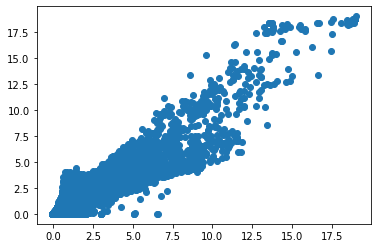

In [42]:
plt.scatter(Y_valid_pred_lr, Y_valid_pred_lgb)

In [46]:
Y_train_pred_lr.shape, Y_train_block.shape

((5089488,), (5089488, 4))

In [48]:
meta_reg = LinearRegression()
X_train_meta = pd.DataFrame({"lr": Y_train_pred_lr, "lgb": Y_train_pred_lgb})
X_valid_meta = pd.DataFrame({"lr": Y_valid_pred_lr, "lgb": Y_valid_pred_lgb})
meta_reg.fit(X_train_meta, Y_train_block["target"].values)
Y_train_pred_meta = meta_reg.predict(X_train_meta)
Y_valid_pred_meta = meta_reg.predict(X_valid_meta)
mse_meta = mean_squared_error(Y_valid_block["target"].values, Y_valid_pred_meta)
print(f"RMSE form stacking: {np.sqrt(mse_meta)}")

RMSE form stacking: 0.7073496598897724


In [49]:
Y_test_pred_lr = lr_reg.predict(X_test_block_prepared)
Y_test_pred_lgb = lgb_reg.predict(X_test_block[features])
Y_test_pred_meta = meta_reg.predict(np.c_[Y_test_pred_lr, Y_test_pred_lgb])

In [52]:
Y_test_pred_meta.min()

-1.5672769217851859

# Load test data

In [56]:
Y_test_block.shape, Y_test_pred_meta.shape

((424124, 2), (424124,))

In [61]:
Y_test_block = X_test_block[["shop_id", "item_id"]].copy()
Y_test_block["item_cnt_month"] = Y_test_pred_meta
Y_test_block["item_cnt_month"] = Y_test_block["item_cnt_month"].map(clip_values)
Y_test_block

,shop_id,item_id,item_cnt_month
0,0,30,0.004865
1,0,31,0.023604
2,0,32,0.000000
3,0,33,0.000000
4,0,35,0.018298
...,...,...,...
424119,59,22154,0.000000
424120,59,22155,0.000000
424121,59,22162,1.138728
424122,59,22164,0.252734


In [107]:
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [108]:
test = pd.merge(test, Y_test_block[["shop_id", "item_id","item_cnt_month"]], on=["shop_id", "item_id"], how="left")
test.fillna(0)[["ID", "item_cnt_month"]].to_csv("submission1_stack.csv", index=False)